# Neuroimaging

*Note: You can download this individual file as a Jupyter Notebook (.ipynb) file by clicking the download button at the top.*

## Exercise 1: Functional connectivity with nilearn

1. Get fMRI and confounds data for one participant from the ADHD dataset
2. Parcellate the fMRI image with the Schäfer 100 atlas and clean in with the corresponding confounds file
3. Estimate functional connectivity with Pearson correlation (try the nilearn `ConnectivityMeasure` class)
4. Plot the connectivity matrix

Useful documentation pages will be:

- https://nilearn.github.io/stable/modules/generated/nilearn.datasets.fetch_adhd.html
- https://nilearn.github.io/stable/modules/generated/nilearn.datasets.fetch_atlas_schaefer_2018.html
- https://nilearn.github.io/dev/modules/generated/nilearn.maskers.NiftiLabelsMasker.html
- https://nilearn.github.io/stable/modules/generated/nilearn.connectome.ConnectivityMeasure.html
- https://nilearn.github.io/stable/modules/generated/nilearn.plotting.plot_matrix.html

[get_dataset_dir] Dataset found in /home/mibur/nilearn_data/adhd
[get_dataset_dir] Dataset found in /home/mibur/nilearn_data/schaefer_2018


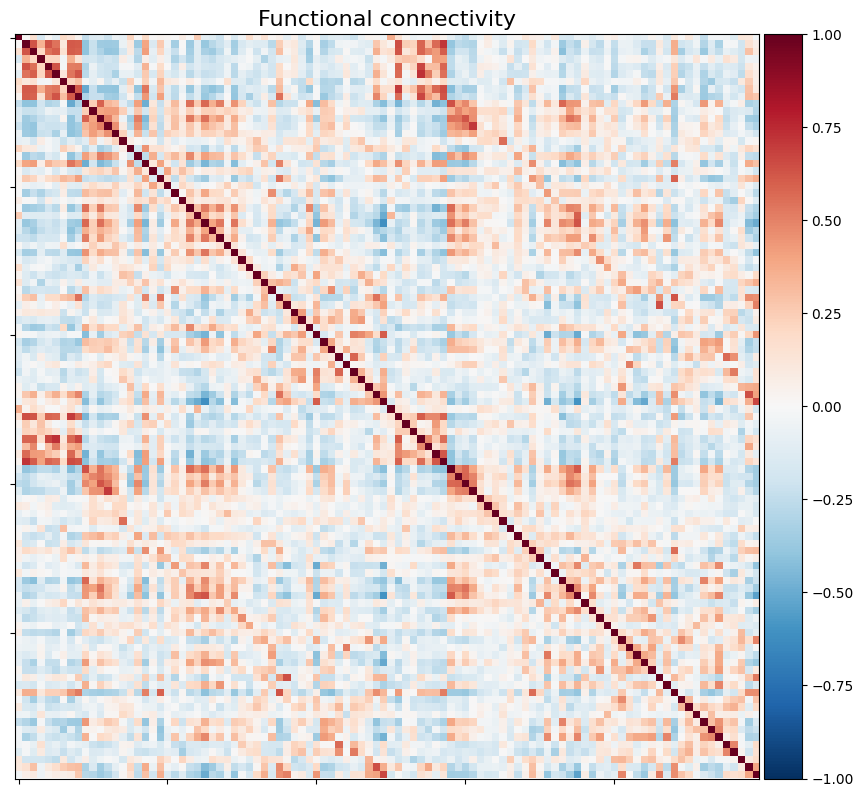

In [12]:
from nilearn import datasets, plotting
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

# 1. Load data
adhd = datasets.fetch_adhd(n_subjects=1)
func = adhd.func[0]
confounds = adhd.confounds[0]

# 2. Parcellate and clean
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=100)
masker = NiftiLabelsMasker(labels_img=atlas.maps,
                           standardize=True,
                           detrend=True)
time_series = masker.fit_transform(func, confounds=confounds)

# 3. Estimate functional connectivity
conn_measure = ConnectivityMeasure(kind='correlation')
conn_matrix  = conn_measure.fit_transform([time_series])[0]

# 4. Plot the connectivity matrix
plotting.plot_matrix(conn_matrix,
                     figure=(8, 8),
                     vmax=1, vmin=-1,
                     title='Functional connectivity');

## Exercise 2: Plotting ERP waveforms

For the EEG exercise, we will use data provided in the workshop. 

A template for loading data from a single participant is provided below, but you will need to modify the path accordingly. You can use it as is, but any other participant will also work. The data was already cleaned and filtered.

**Goal:** Plot the condition-average ERP waveforms for condition "S 48" (happiness) and "S 56" (neutral)

Please implement the following steps:

1. Load the data (already implemented, only needs the correct path)
2. Define the events
3. Epoch "S 48" and "S 56" trials
    - Epochs: -0.2 to 0.8 seconds after the stimulus
    - Baseline correction: -0.2 to 0 seconds
    - Epoch rejection: >150 μV
4. Average the epochs for each condition (already implemented)
5. Plot the condition-average ERP waveforms for each channel

Useful documentation pages will be:

- https://mne.tools/stable/generated/mne.events_from_annotations.html
- https://mne.tools/stable/generated/mne.Epochs.html


Reading /home/mibur/Downloads/PuG Workshop/pug2025-workshop/book/4_additional/solutions/../../3_practical/data/eeg/21013_E4/21013_E4_postICA_interpolated_fixed.fdt


/home/mibur/miniconda3/envs/mne/lib/python3.11/site-packages/pymatreader/utils.py:291: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(


Reading 0 ... 1349759  =      0.000 ...  2699.518 secs...
Used Annotations descriptions: ['S 18', 'S 19', 'S 28', 'S 29', 'S 38', 'S 39', 'S 48', 'S 49', 'S 56', 'S 58', 'S 68', 'S 69', 'S 78', 'S 79']
Not setting metadata
113 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 113 events and 501 original time points ...
0 bad epochs dropped


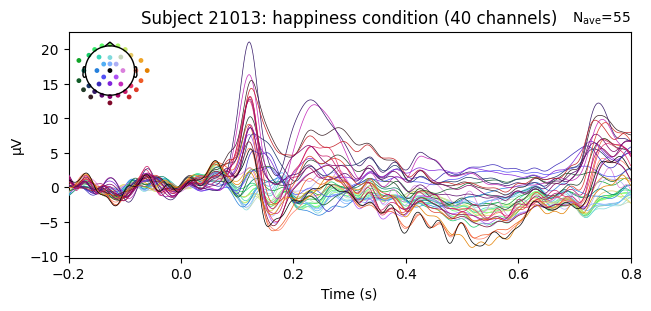

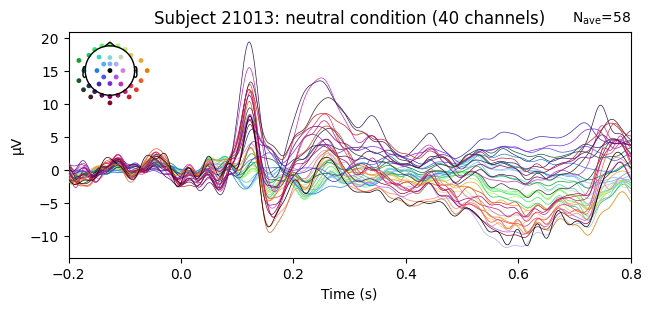

In [1]:
import mne

# 1. Load data
subject = "21013"
fname = f"../../3_practical/data/eeg/{subject}_E4/{subject}_E4_postICA_interpolated_fixed.set"
raw = mne.io.read_raw_eeglab(fname, preload=True)

# 2. Define events
event_map = {f"S {i:2d}": i for i in [18, 19, 28, 29, 38, 39, 48, 49, 56, 58, 68, 69, 78, 79]}
events, event_id = mne.events_from_annotations(raw, event_id=event_map)

# 3. Epoch the relevant conditions
conds = {'happiness': event_id['S 48'], 'neutral': event_id['S 56']}
epochs = mne.Epochs(raw, events, event_id=conds,
                    tmin=-0.2, tmax=0.8,
                    baseline=(-0.2, 0),
                    reject=dict(eeg=150e-6),
                    preload=True)

# 4. Compute condition-average ERP waveforms
evokeds = {cond: epochs[cond].average() for cond in conds}

# 5. Plot the ERP waveforms (butterfly + spatial coloring)
for cond, ev in evokeds.items():
    ev.plot(spatial_colors=True, time_unit='s', titles=f"Subject {subject}: {cond} condition")